In [1]:
# Logistic Regression for Binary Classification of Carts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
# Import data
df = pd.read_csv("../data/item+cart.csv")

In [5]:
# Feature: carts date_created datetime conversion
df["date_created"] = pd.to_datetime(df["date_created"])
df["year_date_created"] = df["date_created"].dt.year
df["month_date_created"] = df["date_created"].dt.month
df["day_date_created"] = df["date_created"].dt.day

# Feature: carts date_cart_transition datetime conversion
df["date_cart_transition"] = pd.to_datetime(df["date_cart_transition"])
df["year_cart_transition"] = df["date_cart_transition"].dt.year
df["month_cart_transition"] = df["date_cart_transition"].dt.month
df["day_cart_transition"] = df["date_cart_transition"].dt.day

# Feature: items date_listed datetime conversion
df["date_listed"] = pd.to_datetime(df["date_listed"])
df["year_item_listed"] = df["date_listed"].dt.year
df["month_item_listed"] = df["date_listed"].dt.month
df["day_item_listed"] = df["date_listed"].dt.day

In [7]:
# Drop binary target along with other features
X = df.drop(columns=["id", "name", "type", "price", "shipping_price", "description_length", "reviews", "product_images","product_videos",
                     "user_id", "date_listed", "date_created", "date_cart_transition", "became_order"])
y = df["became_order"]

In [9]:
print(df.head())
print(X.head())
print(y.head())
print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

   id      name        type   price  shipping_price  description_length  \
0   1  keyboard  technology  208.94           17.79                  71   
1   2   program    software  133.57            0.00                 349   
2   3     shelf      office  335.18           16.19                  33   
3   4   monitor  technology  171.04           14.47                 175   
4   5       USB  technology  205.45            5.30                 389   

   reviews  product_images  product_videos  advertisement  ... became_order  \
0     7269               5              13          20953  ...            1   
1     1035               0              12          24537  ...            0   
2     3176              10               6          22650  ...            1   
3     8661              10              12           1179  ...            0   
4     5728               8              10          35694  ...            1   

   year_date_created  month_date_created day_date_created  \
0            

In [11]:
# Train, test, split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train)
print(X_test)
print(f"X_train Shape: {X_test.shape}")
print(f"X_test Shape: {X_train.shape}")

      advertisement  item_id  total_days_before_cart_creation  \
2694          39383        6                             69.0   
5140          27175       13                             59.0   
2568          35694        5                             48.0   
3671          16603       14                             83.0   
7427           4312       11                             57.0   
...             ...      ...                              ...   
2895          35694        5                             64.0   
7813          35694        5                             48.0   
905           34374        4                             79.0   
5192          27175       13                             59.0   
235           41986       12                             73.0   

      year_date_created  month_date_created  day_date_created  \
2694               2025                   3                25   
5140               2025                   3                19   
2568               2025 

In [13]:
# Standardize Data
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [15]:
# Logistic Regression model for binary classification of carts
model = LogisticRegression(random_state=0, max_iter=1000).fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model prediction score: 0.879875
score = model.score(X_train,y_train)
print(f"Logistic Regression Score: {score}")

Logistic Regression Score: 0.879875


In [17]:
# Confusion Matrix Evaluation
cmatrix = confusion_matrix(y_test,y_pred)
print(cmatrix)

[[791  95]
 [134 980]]


In [19]:
# Receiver Operating Characteristic Curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Receiver Operating Characteristic score: 0.9746449862411904
ROCAUC_score = roc_auc_score(y_test,y_pred_proba)
print(f"ROC AUC Score: {ROCAUC_score}")

ROC AUC Score: 0.9746449862411904


In [21]:
# F1 score for classification 1: 0.8953860210141618
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for Classification 1: {f1}")

# F1 score for classification 0: 0.8735505245720596
f1_0 = f1_score(y_test, y_pred, pos_label=0)
print(f"F1 Score for Classification 0: {f1_0}")

# Precision score for 1 classification: 0.9116279069767442
score_1_class = precision_score(y_test, y_pred, pos_label=1)
print(f"Precision Score for Classification 1: {score_1_class}")

# Precision score for 0 classification: 0.8551351351351352
score_0_class = precision_score(y_test, y_pred, pos_label=0)
print(f"Precision Score for Classification 0: {score_0_class}")

F1 Score for Classification 1: 0.8953860210141618
F1 Score for Classification 0: 0.8735505245720596
Precision Score for Classification 1: 0.9116279069767442
Precision Score for Classification 0: 0.8551351351351352


In [23]:
# Full classification report
cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       886
           1       0.91      0.88      0.90      1114

    accuracy                           0.89      2000
   macro avg       0.88      0.89      0.88      2000
weighted avg       0.89      0.89      0.89      2000



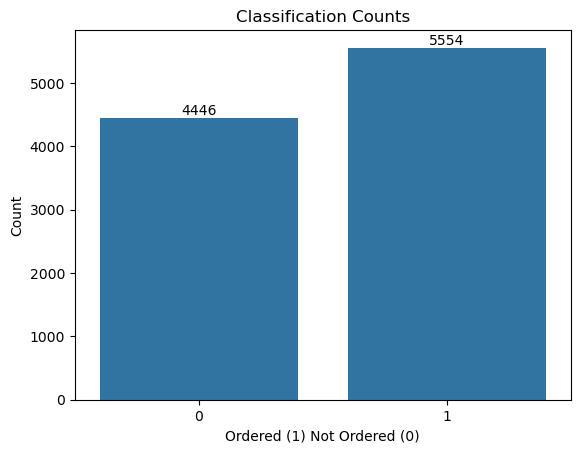

In [25]:
# Graph: Classification Counts
ax = sns.countplot(x=y, data=df)
values = df["became_order"].value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Classification Counts")
plt.xlabel("Ordered (1) Not Ordered (0)")
plt.ylabel("Count")
plt.show()

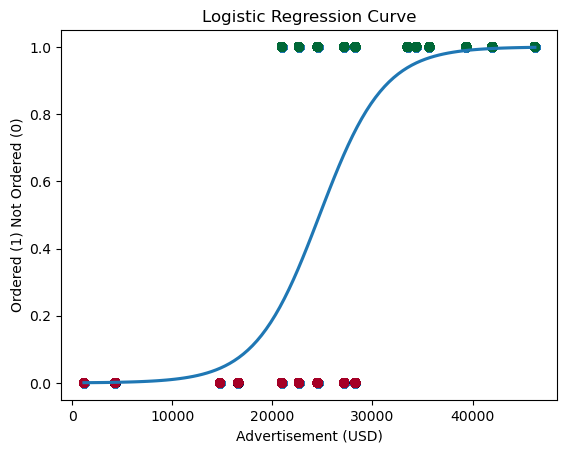

In [27]:
# Graph: Logistic Regression Curve
sns.regplot(x=X["advertisement"], y=y, data=df, logistic=True, ci=None)
plt.scatter(X["advertisement"], y, c=y, cmap="RdYlGn")
plt.title("Logistic Regression Curve")
plt.xlabel("Advertisement (USD)")
plt.ylabel("Ordered (1) Not Ordered (0)")
plt.show()

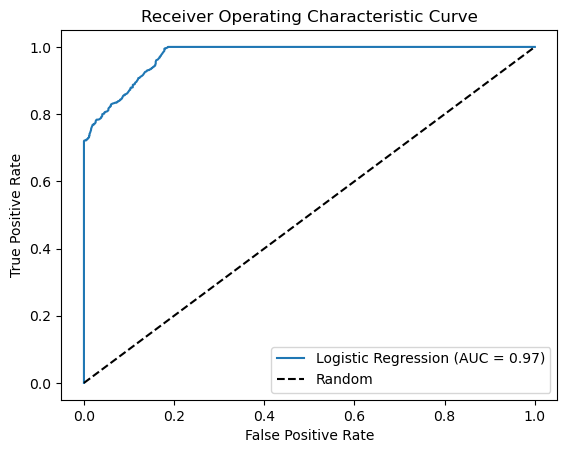

In [29]:
# Graph: Receiver Operating Characteristic Curve
plt.plot(fpr,tpr)
plt.plot([0,1], color="black", linestyle="--")
plt.legend(["Logistic Regression (AUC = 0.97)", "Random"], loc="lower right")
plt.title("Receiver Operating Characteristic Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

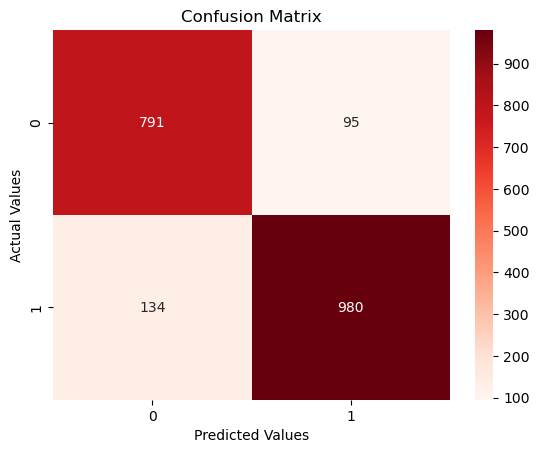

In [31]:
# Graph: Confusion Matrix
plt.figure()
sns.heatmap(data=cmatrix, annot=True, cmap="Reds", fmt="d", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()